In [33]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [34]:
# Importing the new CSV file
Report = pd.read_csv('final_version_dataset.csv')
Report.head()

,HAPPINESS_SCORE,GDP_PER_CAPITA,FAMILY,LIFE_EXPECTANCY,FREEDOM,GENEROSITY,GOVERNMENT_TRUST,DYSTOPIA_RESIDUAL,SOCIAL_SUPPORT
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1.367063
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1.323532
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1.384824
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,1.349466
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1.315484


## Single variable data analysis on Happiness Score

In [35]:
# Creating a DataFrame for Happiness Score, printing out the vital statistics
Happiness = pd.DataFrame(Report['HAPPINESS_SCORE'])
print("Data type : ", type(Happiness))
print("Data dims : ", Happiness.size)
Happiness.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  828


,HAPPINESS_SCORE
0,7.537
1,7.522
2,7.504
3,7.494
4,7.469


In [36]:
# Vital Statistics from the Happiness Score Variable
Happiness.describe()

,HAPPINESS_SCORE
count,828.000000
mean,5.456889
std,1.119641
min,2.566900
25%,4.571000
50%,5.444100
75%,6.283700
max,7.808700


<AxesSubplot:>

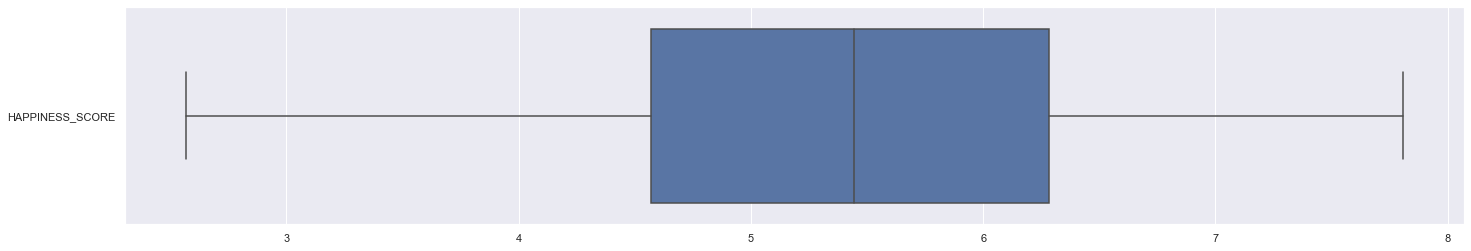

In [37]:
# Creating a boxplot to display the distribution of Happiness Score
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = Happiness, orient = "h")

<AxesSubplot:ylabel='Count'>

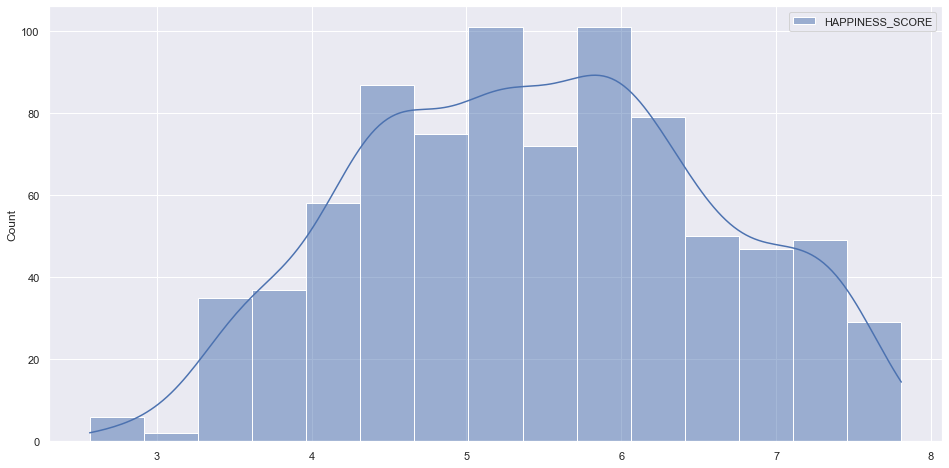

In [38]:
# Creating a Histogram with KDE to display the distribution of Happiness Score
f = plt.figure(figsize=(16, 8))
sb.histplot(data = Happiness, kde = True)

<AxesSubplot:>

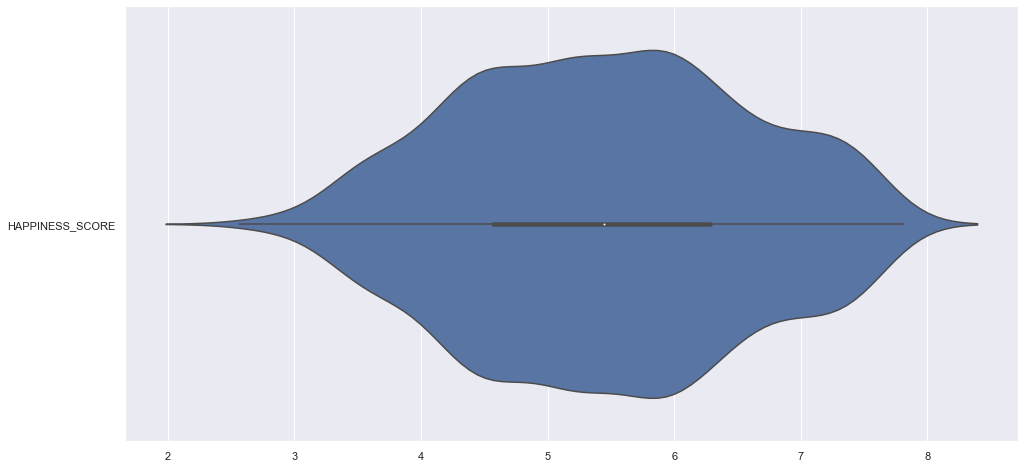

In [39]:
# Creating a violinplot to display the distribution of Happiness Score
f = plt.figure(figsize=(16, 8))
sb.violinplot(data = Happiness, orient = "h")

## Multi-Variate Statistics for numeric variables

In [40]:
# Creating a new dataframe for numeric variables
newDF = pd.DataFrame(Report[["HAPPINESS_SCORE", "GDP_PER_CAPITA","FAMILY","SOCIAL_SUPPORT", "LIFE_EXPECTANCY","FREEDOM","GENEROSITY","GOVERNMENT_TRUST","DYSTOPIA_RESIDUAL"]])
# Summary Statistics for all Variables
newDF.describe()

,HAPPINESS_SCORE,GDP_PER_CAPITA,FAMILY,SOCIAL_SUPPORT,LIFE_EXPECTANCY,FREEDOM,GENEROSITY,GOVERNMENT_TRUST,DYSTOPIA_RESIDUAL
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,5.456889,0.921591,1.006720,1.208191,0.643070,0.423486,0.209650,0.123755,2.078393
std,1.119641,0.389438,0.233679,0.210665,0.238114,0.147411,0.120320,0.107262,0.450184
min,2.566900,0.000000,0.000000,0.352428,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.571000,0.628311,0.894766,1.111928,0.497565,0.319353,0.120956,0.052980,1.891940
50%,5.444100,0.988765,1.024437,1.228763,0.680520,0.435641,0.193935,0.088507,2.086217
75%,6.283700,1.229108,1.124700,1.334285,0.816625,0.541275,0.270015,0.151210,2.239042
max,7.808700,2.096000,1.610574,1.644000,1.141000,0.724000,0.838075,0.551910,3.602140


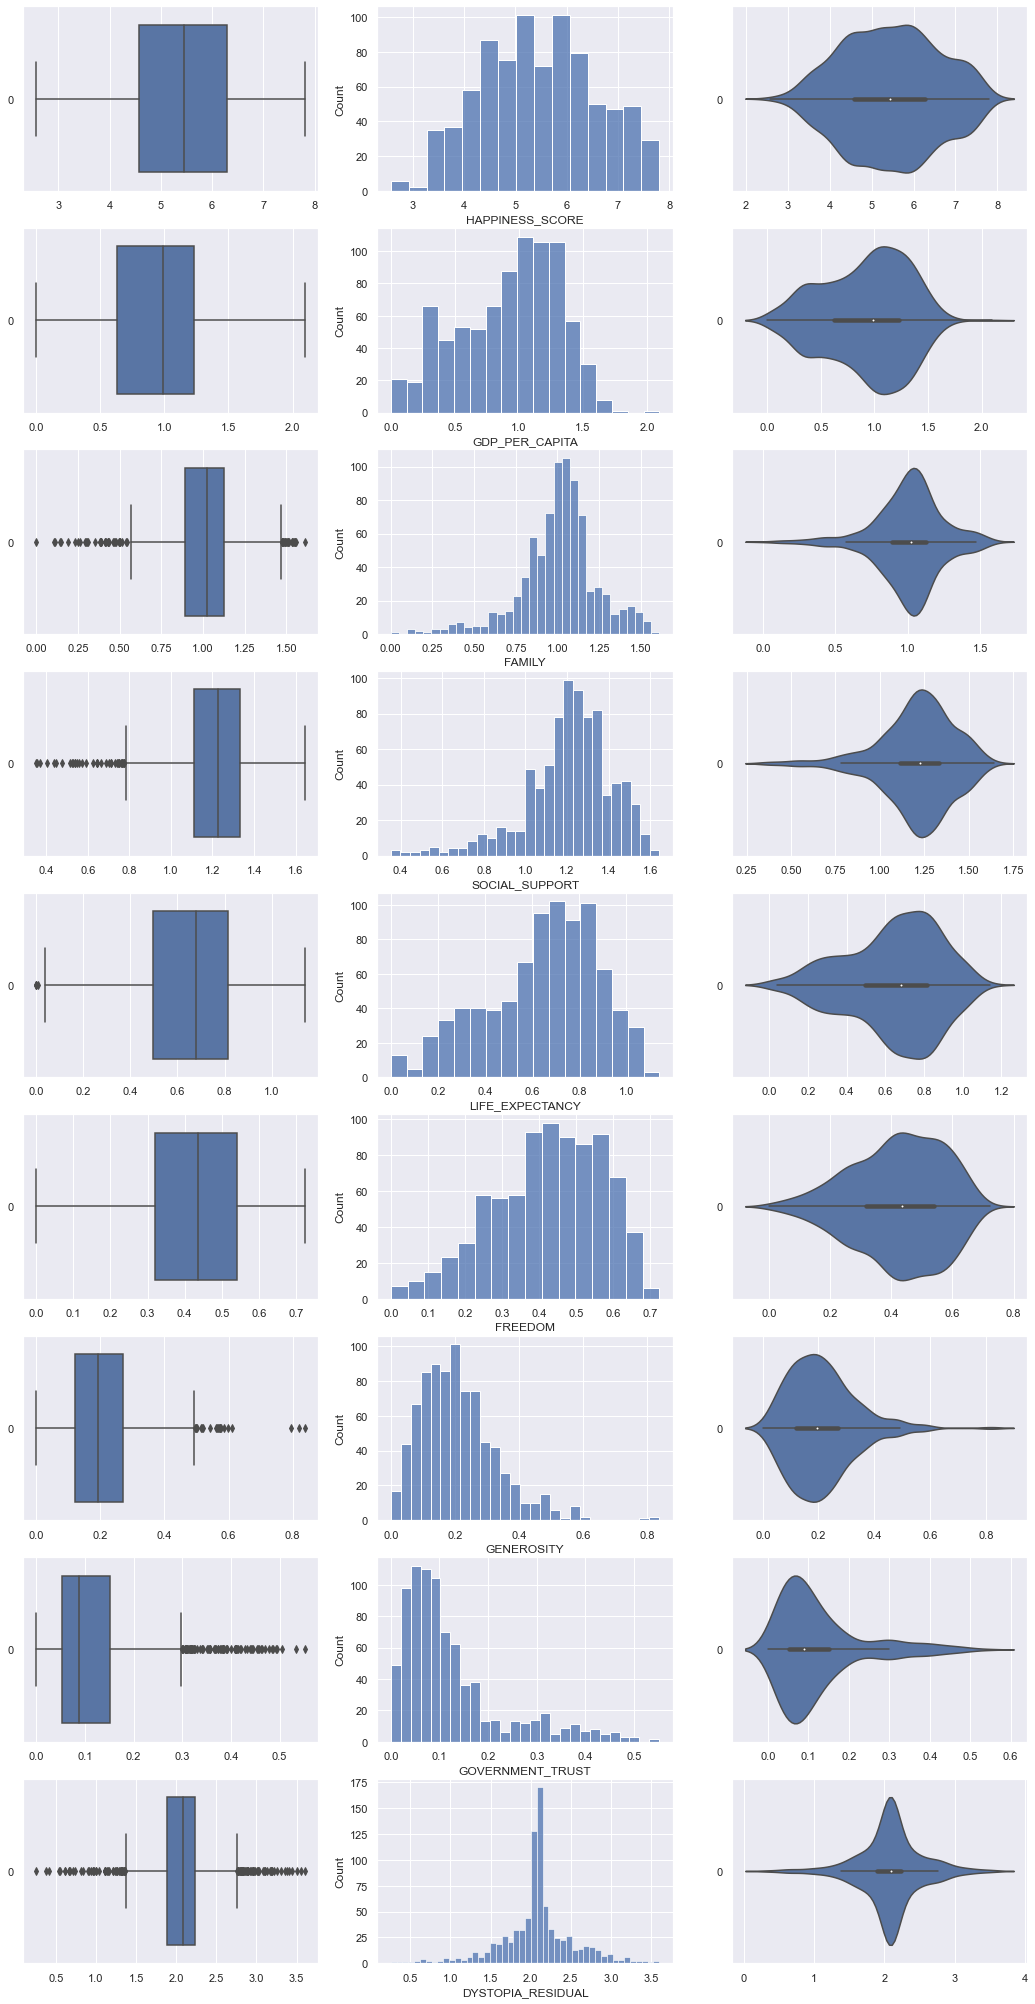

In [41]:
# Draw the distributions of all variables
f, axes = plt.subplots(9, 3, figsize=(18, 36))

count = 0
for var in newDF:
    sb.boxplot(data = newDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = newDF[var], ax = axes[count,1])
    sb.violinplot(data = newDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [42]:
# Calculate the complete  correlation matrix
newDF.corr()

,HAPPINESS_SCORE,GDP_PER_CAPITA,FAMILY,SOCIAL_SUPPORT,LIFE_EXPECTANCY,FREEDOM,GENEROSITY,GOVERNMENT_TRUST,DYSTOPIA_RESIDUAL
HAPPINESS_SCORE,1.000000,0.793986,0.608954,0.702595,0.753465,0.538656,0.150235,0.443330,0.440242
GDP_PER_CAPITA,0.793986,1.000000,0.605332,0.703594,0.779870,0.342027,-0.019512,0.348683,0.088702
FAMILY,0.608954,0.605332,1.000000,0.428354,0.486965,0.435212,0.095864,0.204197,-0.057698
SOCIAL_SUPPORT,0.702595,0.703594,0.428354,1.000000,0.666619,0.399253,0.042807,0.206825,0.067079
LIFE_EXPECTANCY,0.753465,0.779870,0.486965,0.666619,1.000000,0.364710,-0.027538,0.296538,0.099355
FREEDOM,0.538656,0.342027,0.435212,0.399253,0.364710,1.000000,0.302590,0.472742,0.004461
GENEROSITY,0.150235,-0.019512,0.095864,0.042807,-0.027538,0.302590,1.000000,0.286192,-0.055393
GOVERNMENT_TRUST,0.443330,0.348683,0.204197,0.206825,0.296538,0.472742,0.286192,1.000000,0.047195
DYSTOPIA_RESIDUAL,0.440242,0.088702,-0.057698,0.067079,0.099355,0.004461,-0.055393,0.047195,1.000000


<AxesSubplot:>

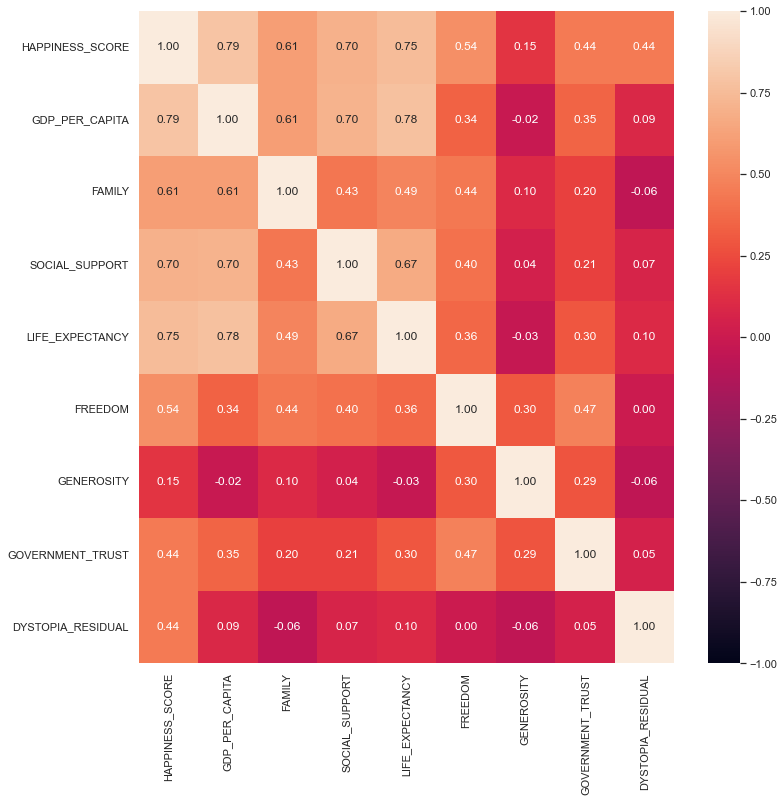

In [43]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(newDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

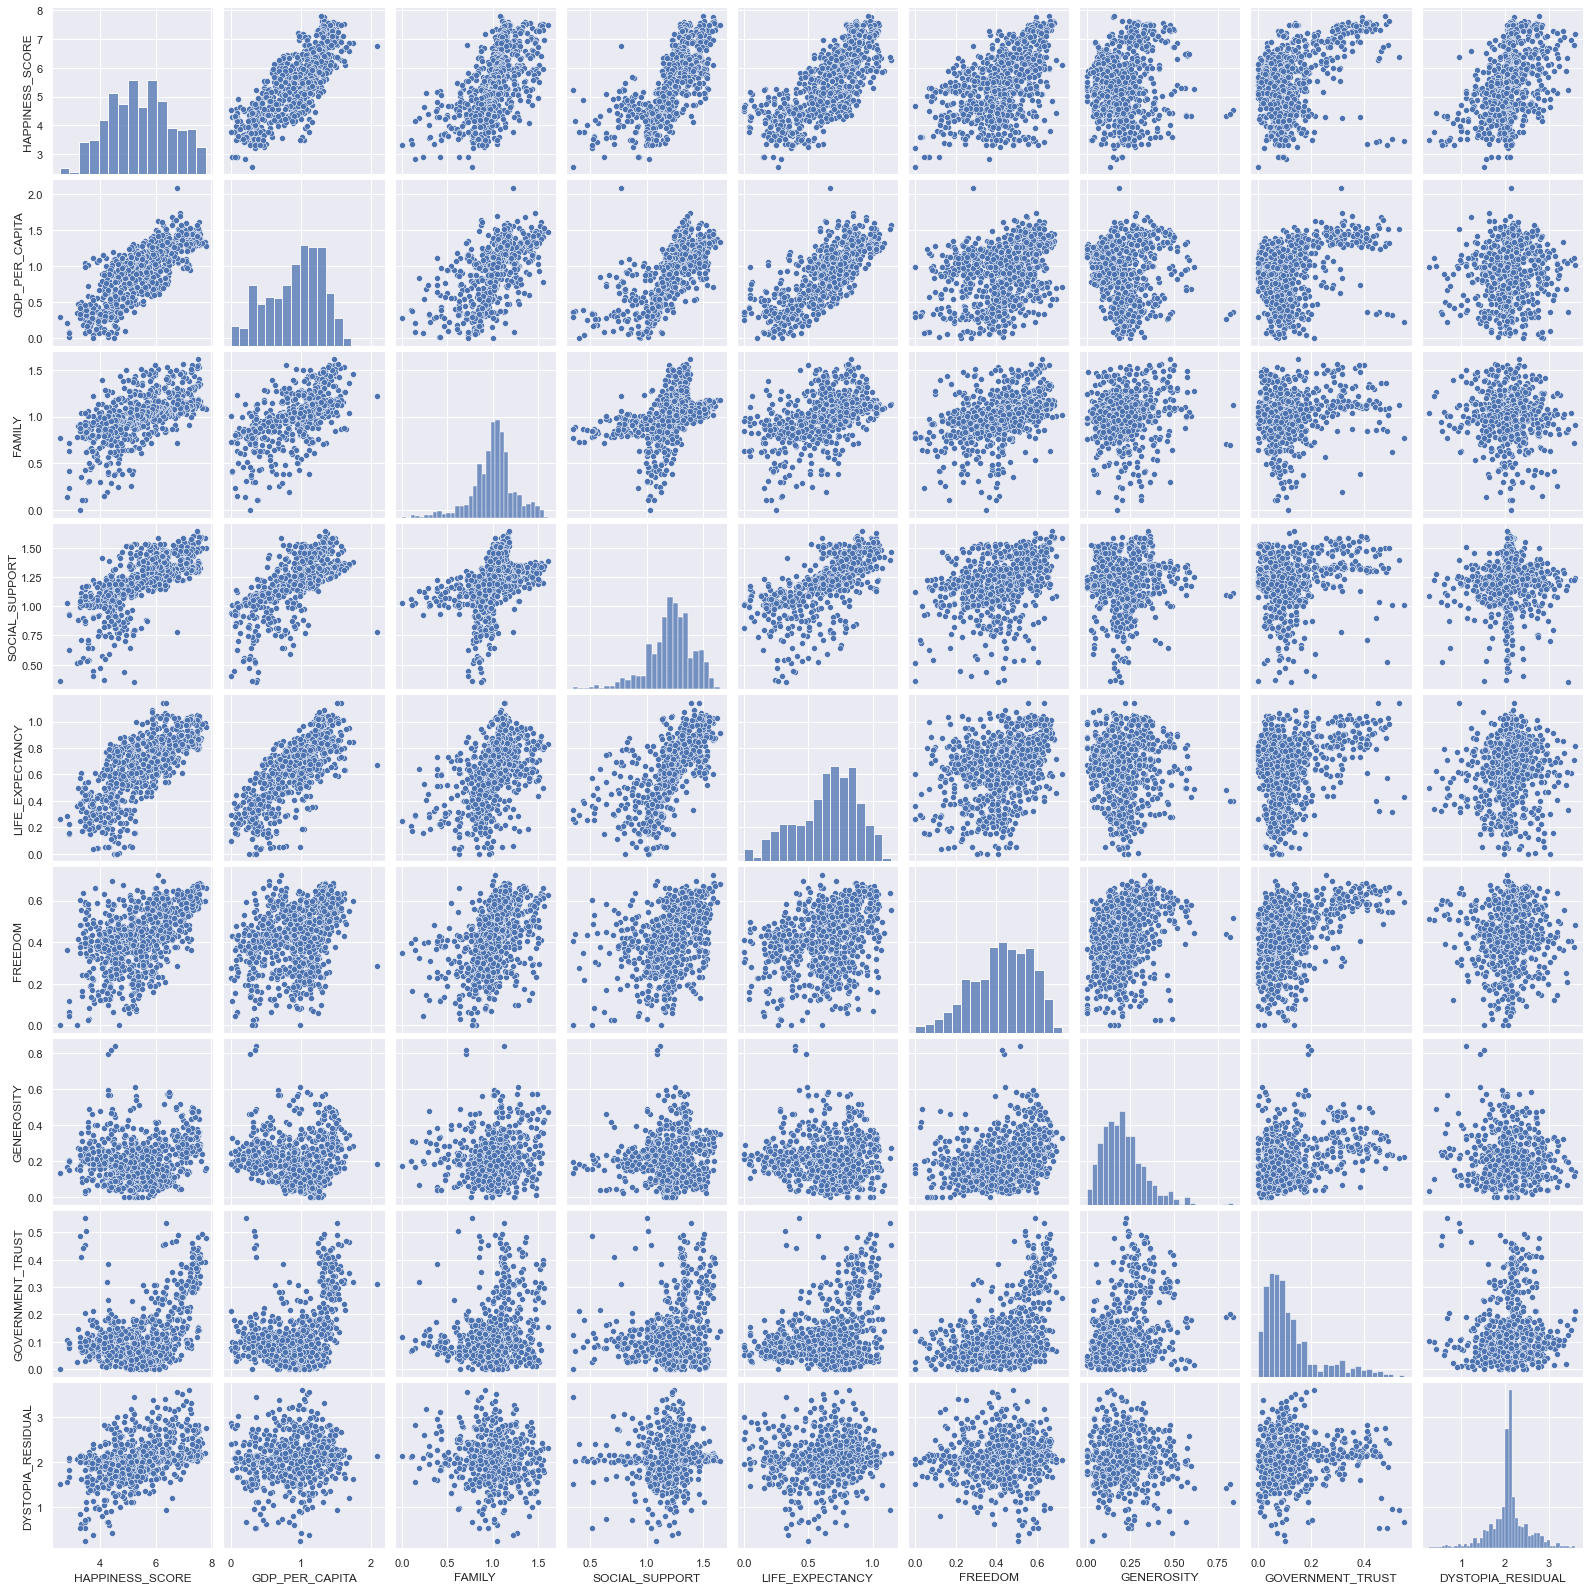

In [44]:
# Draw pairs of variables against one another
sb.pairplot(data = newDF)